# Background Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

# Questions For Investigation

As a general note, be sure to keep a record of any resources that you use or refer to in the creation of your project. You will need to report your sources as part of the project submission.

### 1. What is our independent variable? What is our dependent variable?

The independent variable of the Stroop task is the congruency of the pair of words presented to the subject. The dependent variable is the time it takes for the subject to name the colours with which the words are written. 

### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

When attempting to test the relationship between the response times for the two conditions (congruent and incongruent), the following would be an appropriate set of of hypotheses.

-----

**H0**: The population means for response times for the two conditions, congruent and incongruent, are the same (or effectively the same). 

μ_congruent = μ_incongruent

-----

**HA**: The population means for response times for the two conditions, congruent and incongruent, are not the same. 

μ_congruent ≠ μ_incongruent

-----

An appropriate statistical test to perform in an attempt to determine the likelihood of each these hypotheses is a dependent measures t-test. It makes sense to perform a dependent measures test as all the subjects perform the Stroop task under both conditions [1]. Again, it makes sense to perform a t-test as the purpose of this project is to determine whether the population means of the results for the two conditions are different, but the population standard deviations are not known [2].

This said, the accuracy of the dependent measures t-test is predecated upon the assumption that the differences between the results for the two conditions for each of subjects is normally distributed [3]. This is an assumption that will be tested once the data is explored further.

*Now it’s your chance to try out the Stroop task for yourself. Go to [this link]("https://faculty.washington.edu/chudler/java/ready.html"), which has a Java-based applet for performing the Stroop task. Record the times that you received on the task (you do not need to submit your times to the site.) Now, download [this dataset]("https://www.google.com/url?q=https://drive.google.com/file/d/0B9Yf01UaIbUgQXpYb2NhZ29yX1U/view?usp%3Dsharing&sa=D&ust=1456872119790000&usg=AFQjCNFU9obnMOHc4NeAtOne9oMVawbPjQ") which contains results from a number of participants in the task. Each row of the dataset contains the performance for one participant, with the first number their results on the congruent task and the second number their performance on the incongruent task.*

In [1]:
import pandas as pd
stroop_df = pd.read_csv('./stroopdata.csv')

### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [2]:
print "The number of results for each condition:"
print stroop_df.count()
print "\n"
print "The median result for each condition:"
print stroop_df.median()
print "\n"
print "The mean of the results for each condition:"
print stroop_df.mean()
print "\n"
print "The standard deviation of the results for each condition:"
print stroop_df.std()

The number of results for each condition:
Congruent      24
Incongruent    24
dtype: int64


The median result for each condition:
Congruent      14.3565
Incongruent    21.0175
dtype: float64


The mean of the results for each condition:
Congruent      14.051125
Incongruent    22.015917
dtype: float64


The standard deviation of the results for each condition:
Congruent      3.559358
Incongruent    4.797057
dtype: float64


The fact that the standard deviation for the Incongruent Condition is larger than that of the Congruent Condition suggests that the Incongruent distribution is either wider or that there may be outliers present. A vsiual analysis of the dataset will provide a clearer understanding which of these may be the case.

### 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

##### Visual Analysis of the Dataset

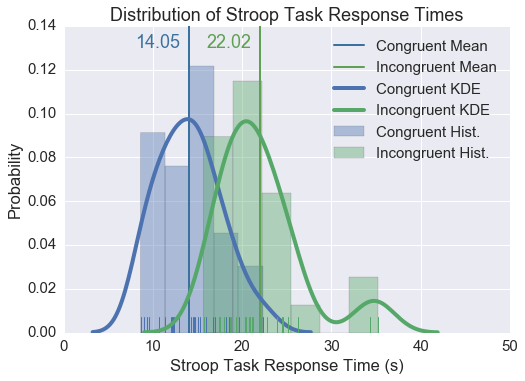

In [3]:
# The following code was written with the aid of the Seaborn[4] and MatPlotLib[5] API docs.

import seaborn as sns
%matplotlib inline

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

con_mean    = stroop_df['Congruent'].mean()
incon_mean  = stroop_df['Incongruent'].mean()

muted_blue  = sns.xkcd_rgb["muted blue"]
muted_green = sns.xkcd_rgb["muted green"]

# Add a vertical line representing the mean of the results for the 'Congruent' condition.
sns.plt.axvline(x=con_mean, linewidth=2, color=muted_blue, label='Congruent Mean')
sns.plt.annotate(str("%.2f" % con_mean), xy=(8, 0.13), xytext=(8, 0.13), color=muted_blue)

# Add a vertical line representing the mean of the results for the 'Incongruent' condition.
sns.plt.axvline(x=incon_mean, linewidth=2, color=muted_green, label='Incongruent Mean')
sns.plt.annotate(str("%.2f" % incon_mean), xy=(16, 0.13), xytext=(16, 0.13), color=muted_green)

# Plot the distributions for both conditions with histograms, Kernel Density Estimates and rugs.
ax = sns.distplot(stroop_df['Congruent'], 
                  label='Congruent Hist.', 
                  kde=True, rug=True, kde_kws={"lw" : 4, "label": "Congruent KDE"})
ax = sns.distplot(stroop_df['Incongruent'], 
                  label='Incongruent Hist.', 
                  kde=True, rug=True, ax=ax, kde_kws={"lw" : 4, "label": "Incongruent KDE"})

# Title and label the plot.
ax.set_title('Distribution of Stroop Task Response Times')
sns.axlabel('Stroop Task Response Time (s)', 'Probability')
sns.plt.xlim([0,50])
sns.plt.legend()
sns.plt.show()

The distribution plot above illustrates that the results for the Incongruent Condition for the most part exhibit higher response times than those for Congruent Condition. That said the distributions do overlap enough that the means for both distributions reside within the range where the Kernel Density Estimates overlap.

The Kernel Density Estimate for the Incongruent Condition exhibits a second peak suggesting that there might be two outlier values (response times near 35 seconds). The outliers are distinct, but not far enough from the peak of the distribution to be obvious outliers. Further analysis is required.

##### Analysis of Outliers

In [4]:
outlier_indices = stroop_df['Incongruent'] > 30

outliers = stroop_df['Incongruent'][outlier_indices]
without_outliers = stroop_df['Incongruent'][outlier_indices == False]

print "Incongruent Condition outlier results in standard deviations from the mean (calculated WITH the outliers):" 
print (outliers - stroop_df['Incongruent'].mean()) / stroop_df['Incongruent'].std()
print "\n"
print "Incongruent Condition outlier results in standard deviations from the mean (calculated WITHOUT the outliers):" 
print (outliers - without_outliers.mean()) / without_outliers.std()

Incongruent Condition outlier results in standard deviations from the mean (calculated WITH the outliers):
14    2.759834
19    2.558252
Name: Incongruent, dtype: float64


Incongruent Condition outlier results in standard deviations from the mean (calculated WITHOUT the outliers):
14    5.004890
19    4.668767
Name: Incongruent, dtype: float64


The values above represent how far the outliers are from the mean of the Incongruent Condition distribution. They are first calculated when the outliers are included and then calculated using mean and standard deviation values calculated without the outliers.

It feels as though these results are still inconculsive considering that a distance of less than 3σ suggests they are not outliers while a distance greater than 4.5σ suggests that they may be.

For the sake of completeness, it feels prudent to complete the rest of the project with and without the outliers and see how much of a difference their inclusion or exclusion makes.

##### Visual Analysis of the Dataset (without outliers)

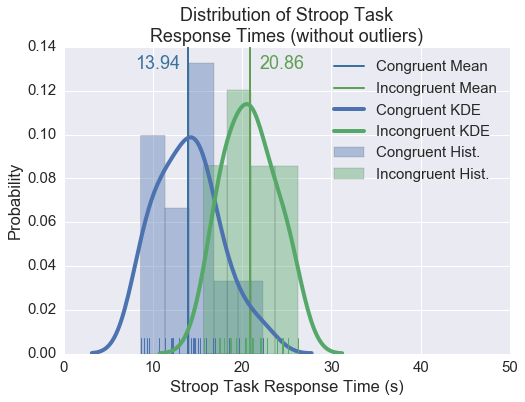

In [5]:
stroop_df_without_outliers = stroop_df[outlier_indices == False]

con_mean    = stroop_df_without_outliers['Congruent'].mean()
incon_mean  = stroop_df_without_outliers['Incongruent'].mean()

# Add a vertical line representing the mean of the results for the 'Congruent' condition.
sns.plt.axvline(x=con_mean, linewidth=2, color=muted_blue, label='Congruent Mean')
sns.plt.annotate(str("%.2f" % con_mean), xy=(8, 0.13), xytext=(8, 0.13), color=muted_blue)

# Add a vertical line representing the mean of the results for the 'Incongruent' condition.
sns.plt.axvline(x=incon_mean, linewidth=2, color=muted_green, label='Incongruent Mean')
sns.plt.annotate(str("%.2f" % incon_mean), xy=(22, 0.13), xytext=(22, 0.13), color=muted_green)

# Plot the distributions for both conditions with histograms, Kernel Density Estimates and rugs.
ax = sns.distplot(stroop_df_without_outliers['Congruent'], 
                  label='Congruent Hist.', 
                  kde=True, rug=True, kde_kws={"lw" : 4, "label": "Congruent KDE"})
ax = sns.distplot(stroop_df_without_outliers['Incongruent'], 
                  label='Incongruent Hist.', 
                  kde=True, rug=True, ax=ax, kde_kws={"lw" : 4, "label": "Incongruent KDE"})

# Title and label the plot.
ax.set_title('Distribution of Stroop Task\nResponse Times (without outliers)')
sns.axlabel('Stroop Task Response Time (s)', 'Probability')
sns.plt.xlim([0,50])
sns.plt.legend()
sns.plt.show()

Given that this analysis involves testing the relationship between two samples of paired results, the paired Congruent Condition results have been removed along with the outlier results for the Incongruent Condition. The removal of these results has produced narrower and slightly closer distributions. The second peak for the Incongruent Condition is no longer present allowing the Kernel Desnity Estimate for that condition to take on a more normal shape [6]. As expected, the mean of the Congruent distribution has not changed dramatically while the mean of the Incongruent distribution has shifted further to the left. It is now more in line with the peak of the Kernel Density Estimate.

##### Testing the Requisite Assumption for the Dependent Measures T-Test (with and without outliers)

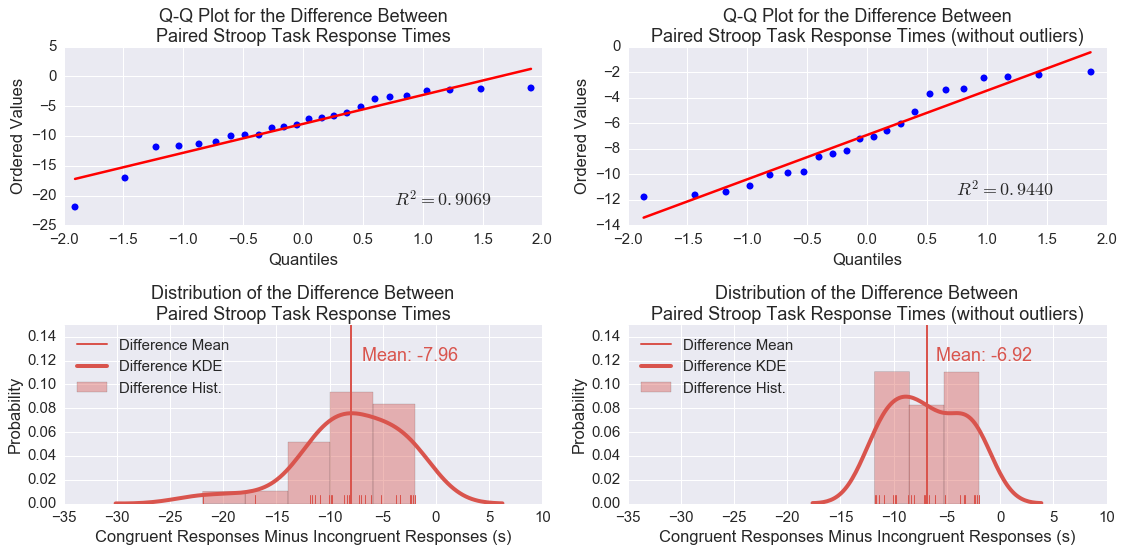

In [6]:
# The following code was written with the aid of the Seaborn[4], MatPlotLib[5] and SciPy[7] API docs.

from scipy import stats
import matplotlib.pyplot as plt

pale_red = sns.xkcd_rgb["pale red"]

#### PLOTS WITH OUTLIERS

difference_in_results = stroop_df['Congruent'] - stroop_df['Incongruent']
mean_of_differences = difference_in_results.mean()
    

sns.plt.figure(figsize=(16, 8))


# Q-Q Plot With Outliers.
sns.plt.subplot(2, 2, 1)
stats.probplot(difference_in_results, dist="norm", plot=plt)
sns.plt.title("Q-Q Plot for the Difference Between\nPaired Stroop Task Response Times")


# Distribution Plot With Outliers.
sns.plt.subplot(2, 2, 3)
# Add a vertical line representing the mean of the paired differences.
sns.plt.axvline(x=mean_of_differences, linewidth=2, color=pale_red, label='Difference Mean')
sns.plt.annotate(str("Mean: %.2f" % mean_of_differences), xy=(-7, 0.12), xytext=(-7, 0.12), color=pale_red)
# Plot the distribution for the paired differences with a histogram, Kernel Density Estimate and rugs.
ax = sns.distplot(difference_in_results, 
                  label='Difference Hist.',
                  color=pale_red,
                  kde=True, rug=True, kde_kws={"lw" : 4, "label": "Difference KDE"})
# Title and label the plot.
ax.set_title('Distribution of the Difference Between\nPaired Stroop Task Response Times')
sns.axlabel('Congruent Responses Minus Incongruent Responses (s)', 'Probability')
sns.plt.xlim([-35, 10])
sns.plt.ylim([0, 0.15])
sns.plt.legend(loc=2)


#### PLOTS WITHOUT OUTLIERS

# Remove outliers from the data.
difference_in_results = stroop_df_without_outliers['Congruent'] - stroop_df_without_outliers['Incongruent']
mean_of_differences = difference_in_results.mean()


# Q-Q Plot Without Outliers.
sns.plt.subplot(2, 2, 2)
stats.probplot(difference_in_results, dist="norm", plot=plt)
sns.plt.title("Q-Q Plot for the Difference Between\nPaired Stroop Task Response Times (without outliers)")


# Distribution Plot Without Outliers.
sns.plt.subplot(2, 2, 4)
# Add a vertical line representing the mean of the paired differences.
sns.plt.axvline(x=mean_of_differences, linewidth=2, color=pale_red, label='Difference Mean')
sns.plt.annotate(str("Mean: %.2f" % mean_of_differences), xy=(-6, 0.12), xytext=(-6, 0.12), color=pale_red)
# Plot the distribution for the paired differences with a histogram, Kernel Density Estimate and rugs.
ax = sns.distplot(difference_in_results, 
                  label='Difference Hist.',
                  color=pale_red,
                  kde=True, rug=True, kde_kws={"lw" : 4, "label": "Difference KDE"})
# Title and label the plot.
ax.set_title('Distribution of the Difference Between\nPaired Stroop Task Response Times (without outliers)')
sns.axlabel('Congruent Responses Minus Incongruent Responses (s)', 'Probability')
sns.plt.xlim([-35, 10])
sns.plt.ylim([0, 0.15])
sns.plt.legend(loc=2)


sns.plt.tight_layout()
sns.plt.show()

Q-Q plots and distribution plots have been created in an attempt understand how well a normal distribution models the difference between the two test conditions [8]. Excluding the outliers did increase the coefficient of determination (R^2) for the Q-Q plots from 0.9069 to 0.9440. The plot including the outliers clearly shows how much further those points are from regression line as compared to the rest of the points (the two points furthest to the left). The distribution plot with the outliers also shows asymetry having been skewed by the outliers. Even though the Kernel Density Estimate for the distribution without the outliers is more symetrical, though without a clearly defined peak, the histogram behind the KDE curve is less normal and more uniform in shape (as confirmed by the rug at the bottom of the plot).

With or without the outliers, a Q-Q plot with a coefficient of determination higher than 0.9 suggests that the difference between paired Stroop Task response times is adequately modeled by a normal distribution. This fulfills the prerequisite assumption needed to continue with the dependent measures t-test [3].

### 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [7]:
import math
from scipy.stats import t

def dependent_measures_t_test(data_a, data_b, alpha, t_critical):
    mean_a = data_a.mean()
    mean_b = data_b.mean()
    difference_of_means = mean_a - mean_b

    difference_between_the_results = data_a - data_b

    sample_size = len(data_a)
    df = sample_size - 1

    std_of_the_differences = difference_between_the_results.std()

    t_stat = difference_of_means / (std_of_the_differences / math.sqrt(sample_size))
    p_value = t.pdf(t_stat, df)
    
    reject_the_null = p_value < alpha

    print "We accept the alternative hypothesis? " + str(reject_the_null)
    print "The p value for a t statistic of " + str(abs(t_stat)) + " with a df of " + str(df) + ": " + str(p_value)
    
    cohens_d = difference_of_means / std_of_the_differences
    
    print "Cohen's D for this test is: " + str(cohens_d)
    
    ci_lower_boundary = difference_of_means - t_critical * (std_of_the_differences / math.sqrt(sample_size))
    ci_upper_boundary = difference_of_means + t_critical * (std_of_the_differences / math.sqrt(sample_size))
                                                            
    print ("The confidence interval for a t-critical value of " + str(t_critical) + " is: " +
            "(" + str(ci_lower_boundary) + ", " + str(ci_upper_boundary) + ")")

##### Dependent Measures T-Test (with outliers)

In [8]:
# We are using an alpha level of 0.025 because this is a two tail test.
# T Critical is based on this alpha level and a df of 23 
# (based on https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg).
t_critical = 2.069
dependent_measures_t_test(stroop_df['Congruent'], stroop_df['Incongruent'], 0.025, t_critical)

We accept the alternative hypothesis? True
The p value for a t statistic of 8.02070694411 with a df of 23: 4.39399581591e-08
Cohen's D for this test is: -1.63721994912
The confidence interval for a t-critical value of 2.069 is: (-10.019367912, -5.91021542131)


##### Dependent Measures T-Test (without outliers)

In [9]:
# We are using an alpha level of 0.025 because this is a two tail test.
# T Critical is based on this alpha level and a df of 21 
# (based on https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg).
t_critical = 2.080
dependent_measures_t_test(stroop_df_without_outliers['Congruent'], 
                          stroop_df_without_outliers['Incongruent'], 0.025, t_critical)

We accept the alternative hypothesis? True
The p value for a t statistic of 9.54109990849 with a df of 21: 3.95700003238e-09
Cohen's D for this test is: -2.03416933531
The confidence interval for a t-critical value of 2.08 is: (-8.425322705, -5.40931365863)


In the end it appears that the affect of the outliers on the results of the dependent measures t-test were much smaller than the original distribution plot an doutlier analysis may have suggested.

For the remainder of this anlysis, the results of the dependent measures t-test that included all of the data will be used.

The dependent measures t-test was performed with an **alpha level of 0.025** because the original hypothesis did not dictate whether the difference in population means should be positiove or negative resulting in a two tailed test. This alpha level and **23 degrees of freedom** results in a **t-critcal value of ±2.069** [8]. The resulting **t-statistic is -8.0207** means we reject the null hypothesis and accept the alternative hypothesis that the population means for the Congruent Condition and Incongruent Condition are not the same. The **95% confidence interval is (-10.0193, -5.9102)**. 

From this, we can conclude with a 95% degree of confidence that the population mean for the time it takes to complete the Incongruent Stroop Task is at least 5.9102 seconds longer than that for the Congruent Stroop Task.

These results match my expectations. Having performed the Stroop Task, it is clear that the Incongruent task is more difficult and would, as a result, take longer.

### 6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

I believe that cognitive dissonance is responsible for the effect observed by the Stroop Task [10]. A similar effect can be found when performing an Implicit Associations Test [11]. This test was popularised in Malcolm Gladwell's book *Blink* [12]. As Gladwell suggests, this test is perhaps a little bit controversial as it can be used to test a subject's implicit level of racism as well as other prejudices.

### Resources referenced for this project:

[1]  "Dependent T-Test for Paired Samples." Dependent T-Test. Accessed March 11, 2016. https://statistics.laerd.com/statistical-guides/dependent-t-test-statistical-guide.php.

[2]  Wikipedia contributors, "Student's t-test," Wikipedia, The Free Encyclopedia, https://en.wikipedia.org/w/index.php?title=Student%27s_t-test&oldid=709322415 (accessed March 11, 2016).

[3]  "Dependent T-Test for Paired Samples (cont...)." Dependent T-Test. Accessed March 11, 2016. https://statistics.laerd.com/statistical-guides/dependent-t-test-statistical-guide-2.php.

[4]  Waskom, Michael "Seaborn: Statistical Data Visualization." Seaborn: Statistical Data Visualization — Seaborn 0.7.0 Documentation. Accessed March 11, 2016. https://stanford.edu/~mwaskom/software/seaborn/index.html.

[5]  Hunter, John, Darren Dale, Eric Firing, Michael Droettboom, and The Matplotlib Development Team. "Introduction." Matplotlib: Python Plotting — Matplotlib 1.5.1 Documentation. Accessed March 11, 2016. http://matplotlib.org/index.html.

[6]  Wikipedia contributors, "Kernel density estimation," Wikipedia, The Free Encyclopedia, https://en.wikipedia.org/w/index.php?title=Kernel_density_estimation&oldid=708927254 (accessed March 11, 2016).

[7]  The Scipy Community. "SciPy." SciPy — SciPy V0.17.0 Reference Guide. Accessed March 11, 2016. http://docs.scipy.org/doc/scipy/reference/index.html.

[8]  Wikipedia contributors, "Q–Q plot," Wikipedia, The Free Encyclopedia, https://en.wikipedia.org/w/index.php?title=Q%E2%80%93Q_plot&oldid=697003051 (accessed March 11, 2016).

[9]  Udacity. T-Table. JPEG, https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg.

[10] Wikipedia contributors, "Cognitive dissonance," Wikipedia, The Free Encyclopedia, https://en.wikipedia.org/w/index.php?title=Cognitive_dissonance&oldid=708440016 (accessed March 11, 2016).

[11] "ProjectImplicit." ProjectImplicit. Accessed March 11, 2016. https://implicit.harvard.edu/implicit/.

[12] Gladwell, Malcolm. Blink: The Power of Thinking without Thinking. London: Penguin, 2006.